In [1]:
import os
import wandb

In [3]:
url = "https://wandb.ai/rl_gsplat/ppo_lr_predictor_distr_no_multiplier_final/sweeps/qcww0wfp"
sweep_name = "ppo_lr_predictor_distr_no_multiplier_final"


# get the data associated with this url and sweep
sweep_id = url.split("/")[-1]
print(f'sweep id: {sweep_id}')
api = wandb.Api()
sweep = api.sweep(sweep_id)

sweep id: qcww0wfp


CommError: Could not find sweep <Sweep rl_gsplat/qcww0wfp/qcww0wfp (Unknown State)>

In [4]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize W&B API
api = wandb.Api()

# Fetch all runs for your project
runs = api.runs("rl_gsplat/ppo_lr_predictor_distr_no_multiplier_final")
metric_name = "num_matches"  # Replace with your metric name

In [6]:
runs.__dict__

{'entity': 'rl_gsplat',
 'project': 'ppo_lr_predictor_distr_no_multiplier_final',
 'filters': {},
 'order': '+created_at',
 '_sweeps': {},
 '_include_sweeps': True,
 'client': <wandb.apis.public.api.RetryingClient at 0x752795adfee0>,
 'variables': {'project': 'ppo_lr_predictor_distr_no_multiplier_final',
  'entity': 'rl_gsplat',
  'order': '+created_at',
  'filters': '{}'},
 'per_page': 50,
 'objects': [],
 'index': -1,
 'last_response': None}

In [36]:
for run in runs[:1]:
    print(run.history(keys=['num_matches_smoothed'])) 
    print(run.__dict__.keys())
    print(run.sweep.name)

Empty DataFrame
Columns: []
Index: []
dict_keys(['_attrs', 'client', '_entity', 'project', '_files', '_base_dir', 'sweep', '_include_sweeps', 'dir', '_summary', '_metadata', '_state', 'user'])
tn3yxii5


In [ ]:
runs[0]history['num_matches_smoothed']

TypeError: 'method' object is not subscriptable

In [37]:
from tqdm import tqdm_notebook
# Store the final, smoothed values of the metric for each run
metric_values = []
sweep_ids = ['qcww0wfp', "tn3yxii5"]
sweep_to_metric = {sweep_id : [] for sweep_id in sweep_ids}

for run in tqdm_notebook(runs):
    # Get the run history DataFrame
    history = run.history(keys=[metric_name])
    sweep_name = run.sweep.name
    
    # Smooth the metric using a moving average (window=10 as an example)
    history[metric_name + "_smoothed"] = history[metric_name].rolling(window=10).mean()
    
    # Drop NaN values resulting from smoothing (if necessary)
    smoothed_metric = history[metric_name + "_smoothed"].dropna()

    sweep_to_metric[sweep_name].append(smoothed_metric.iloc[-1])



/tmp/ipykernel_15096/3658947456.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for run in tqdm_notebook(runs):


  0%|          | 0/1296 [00:00<?, ?it/s]

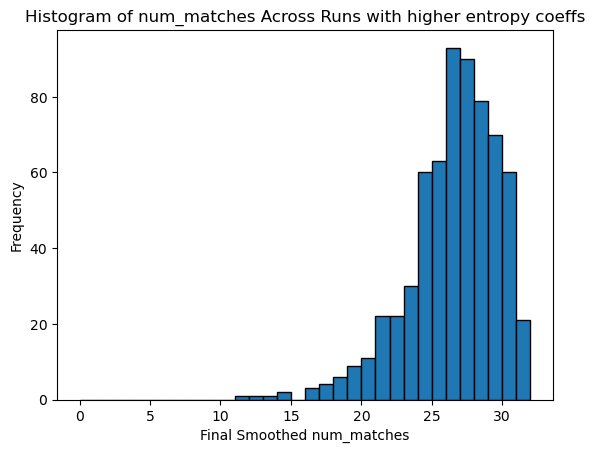

In [53]:
# Plot the histogram of the final metric values across runs
# plot only the first run
# only do 0 to
plt.hist(sweep_to_metric[sweep_ids[0]], range=(0,32), bins=32, edgecolor='black')
plt.xlabel(f"Final Smoothed {metric_name}")
plt.ylabel("Frequency")
plt.title(f"Histogram of {metric_name} Across Runs with higher entropy coeffs")
plt.show()


In [55]:
len(sweep_to_metric[sweep_ids[1]])

648

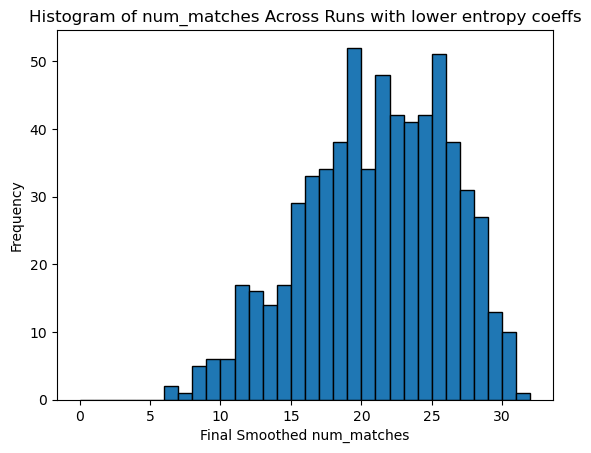

In [ ]:
plt.hist(sweep_to_metric[sweep_ids[1]], range=(0,32), bins=32, edgecolor='black')
plt.xlabel(f"Final Smoothed {metric_name}")
plt.ylabel("Frequency")
plt.title(f"Histogram of {metric_name} Across Runs with lower entropy coeffs")
plt.show()


In [47]:
metric_values = sweep_to_metric[sweep_ids[1]]
metric_values_over28 = [value for value in metric_values if value > 28]

In [48]:
len(metric_values_over28)

39

In [49]:
metric_values_over25 = [value for value in metric_values if value > 25]
print(len(metric_values_over25))

137


In [50]:
metric_values_over31 = [value for value in metric_values if value > 31]


In [51]:
len(metric_values_over31)

0